PHQ-8 features preview:
  participant_id  phq8_total phq8_depress_level
0    test_summer           0            minimal
1   test_summer2           4            minimal
2          test4           0            minimal
3          test5           8               mild
4          test6           8               mild
Shape: (48, 3)
Saved PHQ-8-only file to: /Users/jane/Desktop/ACMMI/Qualtrics/-251123/phq8_features_only.csv


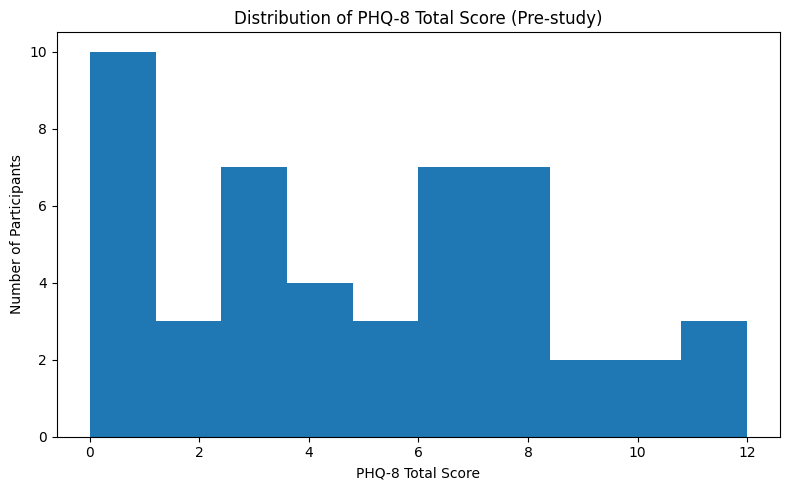

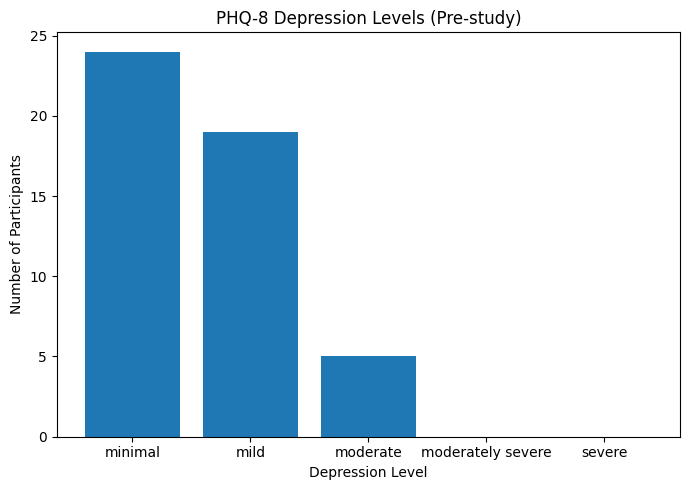


=== PHQ-8 Summary (Pre-study) ===
Mean: 4.895833333333333
Std : 3.434738574915736
Min : 0
Max : 12

Counts by depression level:
phq8_depress_level
minimal              24
mild                 19
moderate              5
moderately severe     0
severe                0
Name: count, dtype: int64


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------
# 0. Helper: CSV loading + basic cleaning
# --------------------------------------------------
def load_dataset(filepath):
    """Load CSV and clean column names + normalize missing values."""
    df = pd.read_csv(filepath)

    # Clean column names
    df.columns = (
        df.columns.str.strip()
                  .str.lower()
                  .str.replace(' ', '_')
                  .str.replace('[^a-zA-Z0-9_]', '', regex=True)
    )

    # Normalize common missing-value tokens
    df.replace(["", "NA", "N/A", "na", "NaN"], np.nan, inplace=True)

    return df


# --------------------------------------------------
# 1. Load PRE-study questionnaire (Qualtrics)
# --------------------------------------------------
pre_path = "/Users/jane/Desktop/ACMMI/Qualtrics/-251123/preliminary: PRE-STUDY QUESTIONNAIRE_December 10, 2025.csv"
df_pre_raw = load_dataset(pre_path)


# Remove Qualtrics metadata rows (0 = questions, 1 = ImportId)
pre_quest_df = df_pre_raw.drop([0, 1]).reset_index(drop=True)


# --------------------------------------------------
# 2. Compute PHQ-8 scores + depression level
# --------------------------------------------------
phq_cols = [col for col in pre_quest_df.columns if col.lower().startswith("phq8_")]

for c in phq_cols:
    # Keep only the first digit (e.g., "2 - Several days" → "2")
    pre_quest_df[c] = pre_quest_df[c].astype(str).str[0]
    pre_quest_df[c] = pre_quest_df[c].replace(["n", "N", "nan", "NaN"], np.nan)
    pre_quest_df[c] = pre_quest_df[c].fillna(0).astype(int)

pre_quest_df["phq8_total"] = pre_quest_df[phq_cols].sum(axis=1)

def phq_group(score):
    if score < 5:
        return "minimal"
    elif score <= 9:
        return "mild"
    elif score <= 14:
        return "moderate"
    elif score <= 19:
        return "moderately severe"
    else:
        return "severe"

pre_quest_df["phq8_depress_level"] = pre_quest_df["phq8_total"].apply(phq_group)

# Extract PHQ-8-only features
phq8_features = pre_quest_df[[
    "participant_id",
    "phq8_total",
    "phq8_depress_level",
]].copy()

print("PHQ-8 features preview:")
print(phq8_features.head())
print("Shape:", phq8_features.shape)


# --------------------------------------------------
# 3. Save PHQ-8-only file
# --------------------------------------------------
save_path = "/Users/jane/Desktop/ACMMI/Qualtrics/-251123/phq8_features_only.csv"
phq8_features.to_csv(save_path, index=False)
print("Saved PHQ-8-only file to:", save_path)


# --------------------------------------------------
# 4. Visualization
# --------------------------------------------------

# Histogram of PHQ-8 total score
plt.figure(figsize=(8, 5))
plt.hist(phq8_features["phq8_total"], bins=10)
plt.title("Distribution of PHQ-8 Total Score (Pre-study)")
plt.xlabel("PHQ-8 Total Score")
plt.ylabel("Number of Participants")
plt.tight_layout()
plt.show()

# Bar chart for depression levels
order = ["minimal", "mild", "moderate", "moderately severe", "severe"]
phq8_features["phq8_depress_level"] = pd.Categorical(
    phq8_features["phq8_depress_level"],
    categories=order,
    ordered=True
)

level_counts = phq8_features["phq8_depress_level"].value_counts().sort_index()

plt.figure(figsize=(7, 5))
plt.bar(level_counts.index.astype(str), level_counts.values)
plt.title("PHQ-8 Depression Levels (Pre-study)")
plt.xlabel("Depression Level")
plt.ylabel("Number of Participants")
plt.tight_layout()
plt.show()

# Summary statistics
print("\n=== PHQ-8 Summary (Pre-study) ===")
print("Mean:", phq8_features["phq8_total"].mean())
print("Std :", phq8_features["phq8_total"].std())
print("Min :", phq8_features["phq8_total"].min())
print("Max :", phq8_features["phq8_total"].max())
print("\nCounts by depression level:")
print(level_counts)


In [9]:
import os

folder = "/Users/jane/Desktop/ACMMI/Qualtrics/-251123/"
for f in os.listdir(folder):
    print(repr(f))


'STAI_only_features.csv'
'preliminary: POST-STRESS MEASURES_December 10, 2025.csv'
'questionnaire_cleaned.csv'
'.DS_Store'
'preliminary: PRE-STRESS MEASURES_November 23, 2025_05.14.csv'
'preliminary: PRE-STUDY QUESTIONNAIRE_November 23, 2025_05.03.csv'
'gad7_features_only.csv'
'jane_Questionnaire_survey-analysis2.ipynb'
'preliminary_+PRE-STUDY+QUESTIONNAIRE+-+Copy_November+23,+2025_05.03.zip'
'Questionnaire_STAI.ipynb'
'preliminary_+PRE-STRESS+MEASURES+-+Copy_November+23,+2025_05.14.zip'
'preliminary: PRE-STUDY QUESTIONNAIRE_December 10, 2025.csv'
'preliminary_+POST-SESSION+QUESTIONNAIRES+-+Copy_November+23,+2025_05.55.zip'
'survey-analysis_kitty.ipynb'
'gad7_features_MIT_only.csv'
'sex_stai_features_mit_only.csv'
'questionnaire_features_for_model.csv'
'preliminary: POST-STRESS MEASURES_STAI-Y2_November 23, 2025_05.53.csv'
'preliminary: POST-SESSION QUESTIONNAIRES_November 23, 2025_05.55.csv'
'preliminary: POST-SESSION QUESTIONNAIRES _December 10, 2025.csv'
'preliminary_+POST-STRESS+ME